#Import the Dataset *'Food Preferences'*

**Context:**
* Title [**Food preferences**](https://www.kaggle.com/datasets/vijayashreer/food-preferences/data)
* Search type: food preference survey
* year: 2019

**Content:**

* Participants: individuals from different countries and with different demographic characteristics
* Sample size: 288 respostas únicas.



In [ ]:
#Importing the Libraries;
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Since we will only be using whole numbers (age), there is no need for floating point numbers.
pd.options.display.float_format = '{:.0f}'.format


In [ ]:
#defining the variable and importing the database;
df = pd.read_csv('Food_Preference.csv')

# First step
**basse cleaning**

In [ ]:
display(df)

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe
...,...,...,...,...,...,...,...,...
283,2019/05/10 9:24:00 AM GMT+8,FPS284,Male,Indian,27,Western Food,Fresh Juice,Yes
284,2019/05/10 9:32:54 AM GMT+8,FPS285,Male,Indian,24,Traditional food,Fresh Juice,Yes
285,2019/05/10 12:09:17 PM GMT+8,FPS286,Male,Indian,25,Traditional food,Fresh Juice,Yes
286,2019/05/10 12:52:17 PM GMT+8,FPS287,Male,Indian,27,Traditional food,Fresh Juice,Yes


In [ ]:
#Checking if there are empty spaces for data handling;
df.isnull().sum()

Timestamp         0
Participant_ID    0
Gender            4
Nationality       0
Age               0
Food              0
Juice             0
Dessert           0
dtype: int64

In [ ]:
#Analyzing Table Empty Spaces;
df[df.Gender.isnull()]

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
14,2019/05/07 3:09:06 PM GMT+8,FPS015,NaN,Muslim,27,Traditional food,Fresh Juice,Yes
225,2019/05/08 1:03:16 PM GMT+8,FPS226,NaN,Indian,30,Traditional food,Fresh Juice,Yes
268,2019/05/10 1:09:22 AM GMT+8,FPS269,NaN,Indian,23,Traditional food,Fresh Juice,Yes
277,2019/05/10 1:46:27 AM GMT+8,FPS278,NaN,Indian,26,Traditional food,Fresh Juice,Yes


In [ ]:
#Verifying the proportion of people with an informed gender and those who do not;
df['Gender'].value_counts()

Gender
Female    165
Male      119
Name: count, dtype: int64

In [ ]:
#How Genderless People Are Not a Significant Number,
#instead of filling in the blanks with 'Not informed'
#We've chosen to remove these lines;
df = df.dropna(subset=['Gender'], axis=0)

In [ ]:
#Checking if there are empty spaces for data handling;
df.isnull().sum()

Timestamp         0
Participant_ID    0
Gender            0
Nationality       0
Age               0
Food              0
Juice             0
Dessert           0
dtype: int64

In [ ]:
#Removing columns that we consider unnecessary for analysis;
df = df.drop(['Timestamp','Participant_ID'], axis=1)

In [ ]:
#Standardizing the formatting and structure
df = df.rename(columns={'Juice': 'Beverages'})


In [ ]:
df['Nationality'].value_counts()

Nationality
Indian         238
Malaysian       10
Indonesia        7
Pakistani        3
MY               2
Japan            2
Maldivian        2
Pakistani        2
Pakistan         1
Korean           1
Mauritian        1
China            1
Malaysia         1
Indonesian       1
Indonesain       1
Seychellois      1
Nigerian         1
Algerian         1
Maldivian        1
Canadian         1
Malaysia         1
MALAYSIAN        1
Indonesian       1
Malaysian        1
Tanzanian        1
Yemen            1
Name: count, dtype: int64

In [ ]:
df = df.replace({'Traditional food': 'Traditional Food',
                'Indonesia': 'Indonesian','Indonesain' : 'Indonesian','Pakistani ':'Pakistani','Pakistan':'Pakistani',
                'MY': 'Malaysian','Malaysia ': 'Malaysian', 'MALAYSIAN':'Malaysian','Malaysian ' : 'Malaysian' })



In [ ]:
df['Nationality'].value_counts()

Nationality
Indian         238
Malaysian       15
Indonesian       9
Pakistani        6
Japan            2
Maldivian        2
Korean           1
Mauritian        1
China            1
Malaysia         1
Seychellois      1
Nigerian         1
Algerian         1
Canadian         1
Indonesian       1
Maldivian        1
Tanzanian        1
Yemen            1
Name: count, dtype: int64

In [ ]:
#Checking for Updates;
display(df.head(10))

,Gender,Nationality,Age,Food,Beverages,Dessert
0,Male,Indian,24,Traditional Food,Fresh Juice,Maybe
1,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,Female,Indian,25,Traditional Food,Fresh Juice,Maybe
4,Male,Indian,27,Traditional Food,Fresh Juice,Maybe
5,Male,Indian,24,Traditional Food,Fresh Juice,Yes
6,Female,Indian,34,Traditional Food,Fresh Juice,Yes
7,Male,Pakistani,24,Western Food,Carbonated drinks,Yes
8,Female,Indian,19,Traditional Food,Fresh Juice,Yes
9,Female,Indian,16,Western Food,Fresh Juice,Yes


# Second step
**data analysis**

**analyzes carried out**
* Food preference;
* Beverages preference;
* Dessert preference;

**analysis categories**
* General;
* Gender;
* Nacionality;
* Age;

## Analysis of food preferences


### preference of the general public



In [ ]:
display(df[['Gender','Age','Nationality','Food']])

,Gender,Age,Nationality,Food
0,Male,24,Indian,Traditional Food
1,Female,22,Indian,Western Food
2,Male,31,Indian,Western Food
3,Female,25,Indian,Traditional Food
4,Male,27,Indian,Traditional Food
...,...,...,...,...
283,Male,27,Indian,Western Food
284,Male,24,Indian,Traditional Food
285,Male,25,Indian,Traditional Food
286,Male,27,Indian,Traditional Food


In [ ]:
#food preference analysis for the general public;
analyze_food = df['Food'].value_counts()
display(analyze_food)

Food
Traditional Food    234
Western Food         50
Name: count, dtype: int64

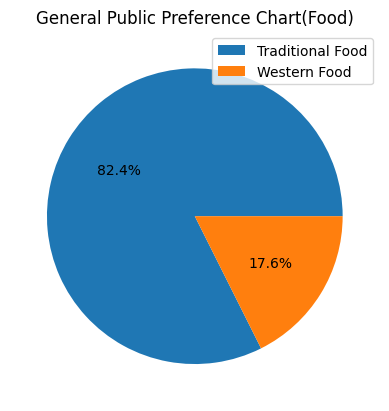

In [ ]:
#Creating Chart for a Clearer Sense;
plt.pie(analyze_food, autopct='%1.1f%%')
plt.title('General Public Preference Chart(Food)')
plt.legend(analyze_food.index, loc='best')
plt.show()

In [ ]:
#Analysing by age;
analyze_food_age = df.groupby('Food')['Age'].value_counts()
display(analyze_food_age)

Food              Age
Traditional Food  25     20
                  30     13
                  27     13
                  28     12
                  24     12
                         ..
Western Food      26      1
                  20      1
                  18      1
                  15      1
                  9       1
Name: count, Length: 68, dtype: int64

Double click (ou pressione"Enter")to edit

<Axes: xlabel='Food', ylabel='Age'>

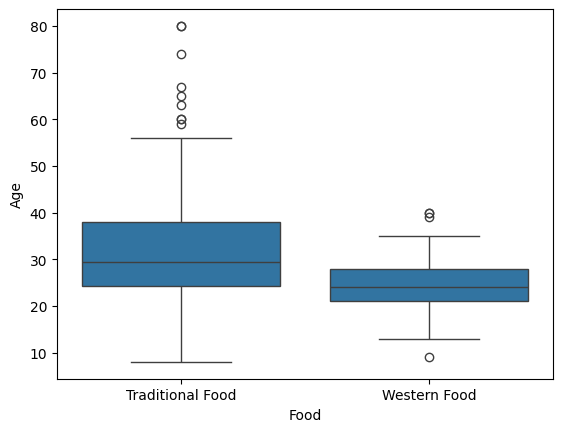

In [ ]:
#boxplot
sns.boxplot(x='Food', y='Age', data=df)

In [ ]:
#Analysis by nationality
analyze_food_nationality = df.groupby('Food')['Nationality'].value_counts()
display(analyze_food_nationality)

Food              Nationality
Traditional Food  Indian         201
                  Malaysian       10
                  Indonesian       8
                  Pakistani        4
                  Maldivian        1
                  Mauritian        1
                  Nigerian         1
                  China            1
                  Seychellois      1
                  Tanzanian        1
                  Yemen            1
                  Malaysia         1
                  Japan            1
                  Indonesian       1
                  Algerian         1
Western Food      Indian          37
                  Malaysian        5
                  Maldivian        2
                  Pakistani        2
                  Canadian         1
                  Indonesian       1
                  Japan            1
                  Korean           1
Name: count, dtype: int64

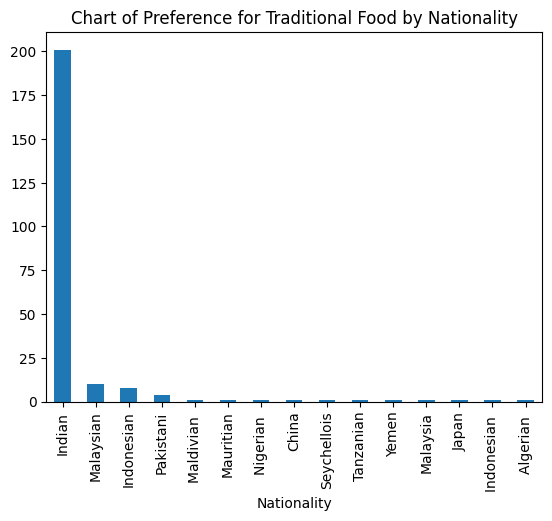

In [ ]:
analyze_food_nationality['Traditional Food'].plot.bar()
plt.title('Chart of Preference for Traditional Food by Nationality')
plt.show()

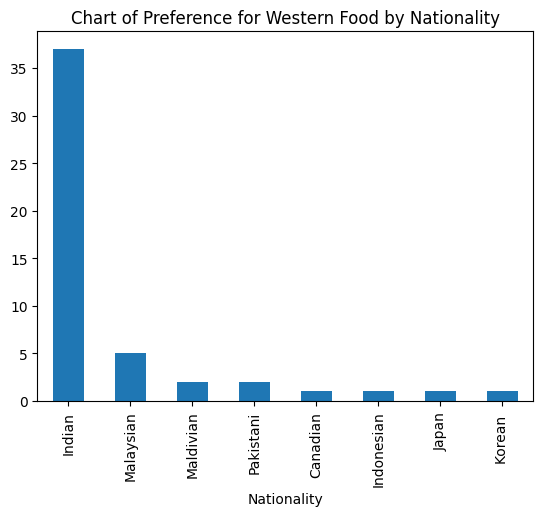

In [ ]:
analyze_food_nationality['Western Food'].plot.bar()
plt.title('Chart of Preference for Western Food by Nationality')
plt.show()

### Female audience preference

In [ ]:
#Filtering data for the female audience
df_fem = df[df['Gender'] == 'Female']

In [ ]:
display(df_fem[['Gender','Age','Nationality','Food']])

,Gender,Age,Nationality,Food
1,Female,22,Indian,Western Food
3,Female,25,Indian,Traditional Food
6,Female,34,Indian,Traditional Food
8,Female,19,Indian,Traditional Food
9,Female,16,Indian,Western Food
...,...,...,...,...
258,Female,42,Indian,Traditional Food
259,Female,37,Indian,Traditional Food
260,Female,46,Indian,Traditional Food
261,Female,36,Indian,Traditional Food


In [ ]:
#Analysis of food preference by the female audience;
analyze_food_fem = df.loc[df['Gender'] == 'Female',['Food']].value_counts()
display(analyze_food_fem)

Food            
Traditional Food    144
Western Food         21
Name: count, dtype: int64

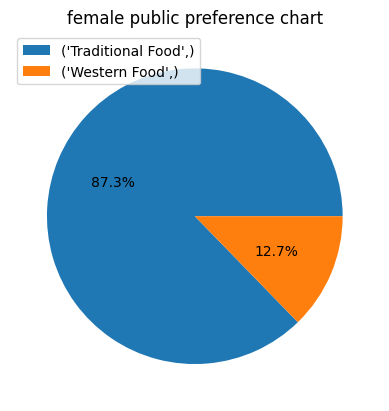

In [ ]:
#Graphic
plt.pie(analyze_food_fem, autopct='%1.1f%%')
plt.title('female public preference chart')
plt.legend(analyze_food_fem.index, loc='best')
plt.show()

In [ ]:
#Analysing by age;
analyze_food_age_fem = df_fem.groupby('Food')['Age'].value_counts()
display(analyze_food_age_fem)

Food              Age
Traditional Food  25     13
                  40     10
                  37      8
                  30      8
                  28      7
                  33      7
                  38      6
                  35      6
                  24      5
                  27      5
                  45      4
                  32      4
                  42      4
                  39      4
                  34      4
                  36      4
                  22      4
                  21      4
                  31      3
                  54      3
                  23      3
                  20      3
                  19      3
                  50      3
                  29      2
                  26      2
                  80      2
                  8       1
                  65      1
                  63      1
                  60      1
                  56      1
                  53      1
                  51      1
                  49      

<Axes: xlabel='Food', ylabel='Age'>

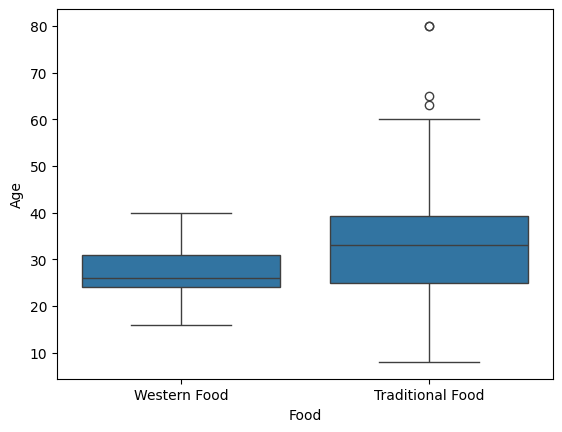

In [ ]:
#boxplot
sns.boxplot(x='Food', y='Age', data=df_fem)

In [ ]:
#Analysis by female nationality
analyze_food_nationality_fem = df_fem.groupby('Food')['Nationality'].value_counts()
display(analyze_food_nationality_fem)

Food              Nationality
Traditional Food  Indian         132
                  Malaysian        4
                  Indonesian       2
                  Algerian         1
                  China            1
                  Indonesian       1
                  Mauritian        1
                  Nigerian         1
                  Pakistani        1
Western Food      Indian          17
                  Maldivian        2
                  Japan            1
                  Malaysian        1
Name: count, dtype: int64

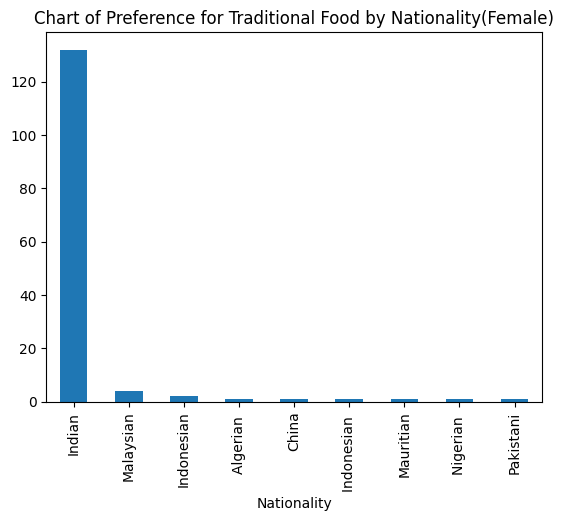

In [ ]:
analyze_food_nationality_fem['Traditional Food'].plot.bar()
plt.title('Chart of Preference for Traditional Food by Nationality(Female)')
plt.show()

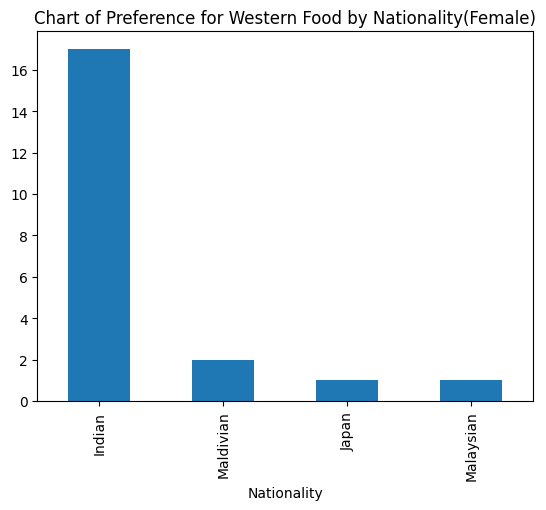

In [ ]:
analyze_food_nationality_fem['Western Food'].plot.bar()
plt.title('Chart of Preference for Western Food by Nationality(Female)')
plt.show()

### Male audience preference

In [ ]:
#Filtering data for the male audience
df_male = df[df['Gender'] == 'Male']

In [ ]:
display(df_male[['Gender','Age','Nationality','Food']])

,Gender,Age,Nationality,Food
0,Male,24,Indian,Traditional Food
2,Male,31,Indian,Western Food
4,Male,27,Indian,Traditional Food
5,Male,24,Indian,Traditional Food
7,Male,24,Pakistani,Western Food
...,...,...,...,...
283,Male,27,Indian,Western Food
284,Male,24,Indian,Traditional Food
285,Male,25,Indian,Traditional Food
286,Male,27,Indian,Traditional Food


In [ ]:
#Analysis of food by male gender
analyze_food_male = df.loc[df['Gender'] == 'Male',['Food']].value_counts()
display(analyze_food_male)

Food            
Traditional Food    90
Western Food        29
Name: count, dtype: int64

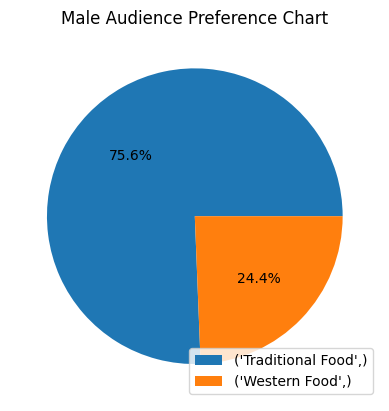

In [ ]:
plt.pie(analyze_food_male, autopct='%1.1f%%')
plt.title('Male Audience Preference Chart')
plt.legend(analyze_food_male.index, loc='best')
plt.show()

In [ ]:
#Analysing by age;
analyze_food_age_male = df_male.groupby('Food')['Age'].value_counts()
display(analyze_food_age_male)

Food              Age
Traditional Food  27     8
                  23     8
                  26     8
                  25     7
                  24     7
                  19     5
                  30     5
                  21     5
                  28     5
                  38     5
                  20     3
                  34     3
                  9      2
                  33     2
                  22     2
                  47     1
                  74     1
                  67     1
                  60     1
                  59     1
                  56     1
                  54     1
                  12     1
                  43     1
                  42     1
                  39     1
                  36     1
                  31     1
                  29     1
                  18     1
Western Food      24     4
                  13     4
                  27     4
                  22     2
                  23     2
                  21     2
      

<Axes: xlabel='Food', ylabel='Age'>

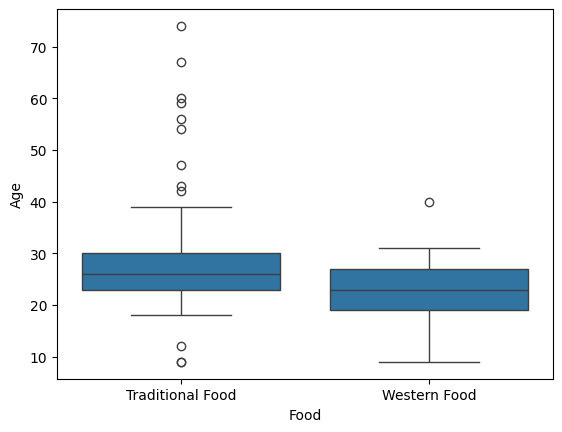

In [ ]:
#boxplot
sns.boxplot(x='Food', y='Age', data=df_male)

In [ ]:
#Analysis by male nationality
analyze_food_nationality_male = df_male.groupby('Food')['Nationality'].value_counts()
display(analyze_food_nationality_male)

Food              Nationality
Traditional Food  Indian         69
                  Indonesian      6
                  Malaysian       6
                  Pakistani       3
                  Japan           1
                  Malaysia        1
                  Maldivian       1
                  Seychellois     1
                  Tanzanian       1
                  Yemen           1
Western Food      Indian         20
                  Malaysian       4
                  Pakistani       2
                  Canadian        1
                  Indonesian      1
                  Korean          1
Name: count, dtype: int64

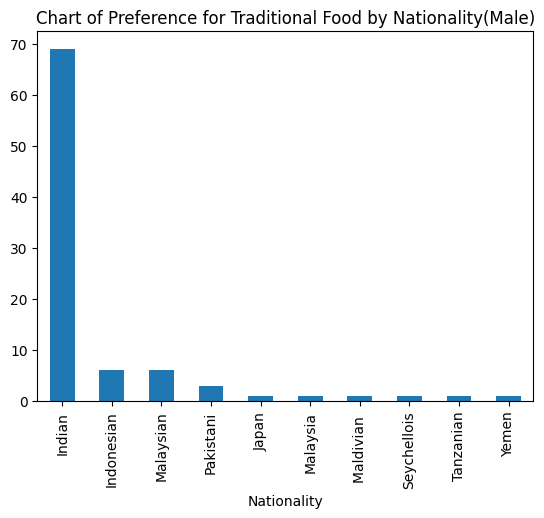

In [ ]:
analyze_food_nationality_male['Traditional Food'].plot.bar()
plt.title('Chart of Preference for Traditional Food by Nationality(Male)')
plt.show()

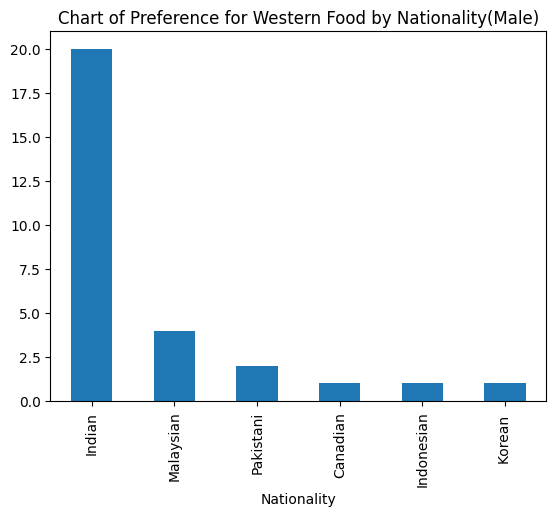

In [ ]:
analyze_food_nationality_male['Western Food'].plot.bar()
plt.title('Chart of Preference for Western Food by Nationality(Male)')
plt.show()

## Analysis of Beverages preferences

### General public preference



In [ ]:
display(df[['Gender','Age','Nationality','Beverages']])

,Gender,Age,Nationality,Beverages
0,Male,24,Indian,Fresh Juice
1,Female,22,Indian,Carbonated drinks
2,Male,31,Indian,Fresh Juice
3,Female,25,Indian,Fresh Juice
4,Male,27,Indian,Fresh Juice
...,...,...,...,...
283,Male,27,Indian,Fresh Juice
284,Male,24,Indian,Fresh Juice
285,Male,25,Indian,Fresh Juice
286,Male,27,Indian,Fresh Juice


In [ ]:
#Beverages preference analysis for the general public;
analyze_beverages = df['Beverages'].value_counts()
display(analyze_beverages)

Beverages
Fresh Juice          252
Carbonated drinks     32
Name: count, dtype: int64

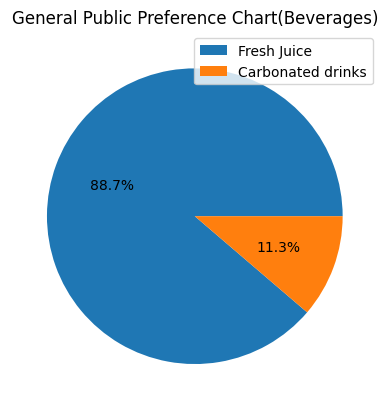

In [ ]:
#Creating Chart for a Clearer Sense;
plt.pie(analyze_beverages, autopct='%1.1f%%')
plt.title('General Public Preference Chart(Beverages)')
plt.legend(analyze_beverages.index, loc='best')
plt.show()

In [ ]:
#Analysing by age;
analyze_beverages_age = df.groupby('Beverages')['Age'].value_counts()
display(analyze_beverages_age)

Beverages          Age
Carbonated drinks  21     5
                   23     4
                   25     3
                   24     2
                   28     2
                         ..
Fresh Juice        43     1
                   44     1
                   8      1
                   12     1
                   17     1
Name: count, Length: 66, dtype: int64

<Axes: xlabel='Beverages', ylabel='Age'>

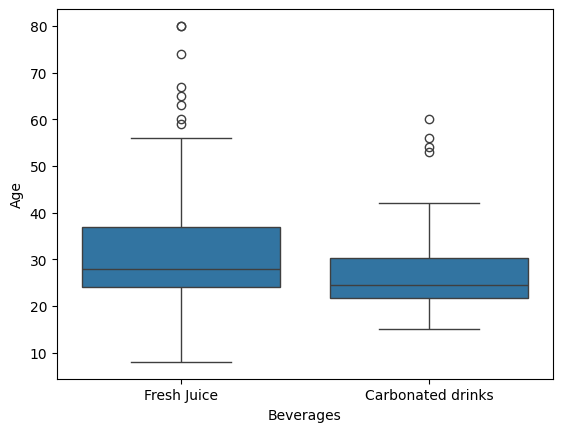

In [ ]:
#boxplot
sns.boxplot(x='Beverages', y='Age', data=df)

In [ ]:
#Analysis by nationality
analyze_beverages_nationality = df.groupby('Beverages')['Nationality'].value_counts()
display(analyze_beverages_nationality)

Beverages          Nationality
Carbonated drinks  Indian          24
                   Malaysian        3
                   Pakistani        2
                   Indonesian       1
                   Seychellois      1
                   Maldivian        1
Fresh Juice        Indian         214
                   Malaysian       12
                   Indonesian       8
                   Pakistani        4
                   Japan            2
                   Malaysia         1
                   Tanzanian        1
                   Nigerian         1
                   Mauritian        1
                   Maldivian        1
                   Maldivian        1
                   Indonesian       1
                   Korean           1
                   China            1
                   Canadian         1
                   Algerian         1
                   Yemen            1
Name: count, dtype: int64

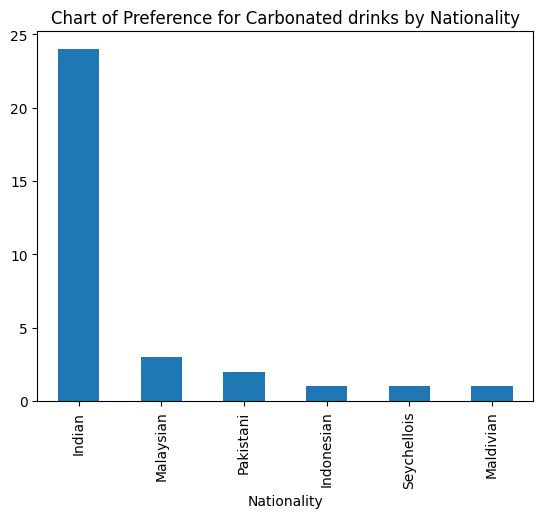

In [ ]:
analyze_beverages_nationality['Carbonated drinks'].plot.bar()
plt.title('Chart of Preference for Carbonated drinks by Nationality')
plt.show()

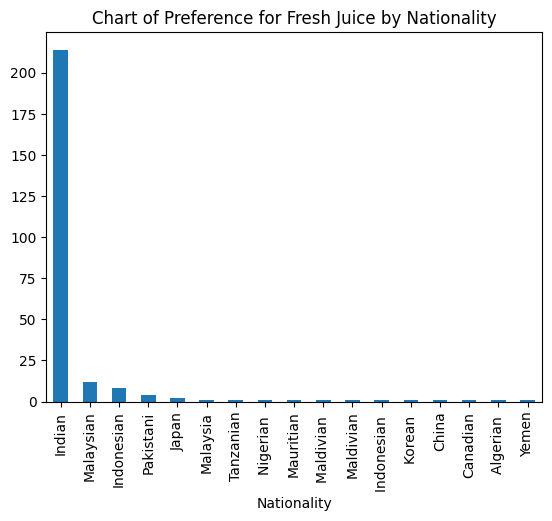

In [ ]:
analyze_beverages_nationality['Fresh Juice'].plot.bar()
plt.title('Chart of Preference for Fresh Juice by Nationality')
plt.show()

### Female audience preference


In [ ]:
#Filtering data for the female audience
df_fem = df[df['Gender'] == 'Female']

In [ ]:
display(df_fem[['Gender','Age','Nationality','Beverages']])

,Gender,Age,Nationality,Beverages
1,Female,22,Indian,Carbonated drinks
3,Female,25,Indian,Fresh Juice
6,Female,34,Indian,Fresh Juice
8,Female,19,Indian,Fresh Juice
9,Female,16,Indian,Fresh Juice
...,...,...,...,...
258,Female,42,Indian,Fresh Juice
259,Female,37,Indian,Fresh Juice
260,Female,46,Indian,Fresh Juice
261,Female,36,Indian,Fresh Juice


In [ ]:
#Analysis of beverages preference by the female audience;
analyze_beverages_fem = df.loc[df['Gender'] == 'Female',['Beverages']].value_counts()
display(analyze_beverages_fem)

Beverages        
Fresh Juice          152
Carbonated drinks     13
Name: count, dtype: int64

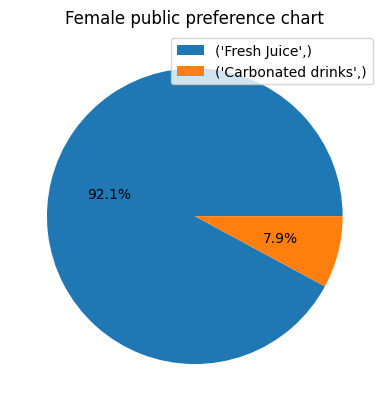

In [ ]:
#Graphic
plt.pie(analyze_beverages_fem, autopct='%1.1f%%')
plt.title('Female public preference chart')
plt.legend(analyze_beverages_fem.index, loc='best')
plt.show()

In [ ]:
#Analysing by age;
analyze_beverages_age_fem = df_fem.groupby('Beverages')['Age'].value_counts()
display(analyze_beverages_age_fem)

Beverages          Age
Carbonated drinks  25      2
                   31      2
                   22      1
                   24      1
                   26      1
                   28      1
                   33      1
                   42      1
                   53      1
                   54      1
                   21      1
Fresh Juice        25     12
                   40     11
                   30      9
                   24      8
                   37      8
                   28      7
                   35      7
                   33      6
                   38      6
                   27      5
                   22      5
                   34      5
                   39      5
                   36      4
                   32      4
                   19      4
                   45      4
                   29      4
                   20      3
                   21      3
                   42      3
                   23      3
                   5

<Axes: xlabel='Beverages', ylabel='Age'>

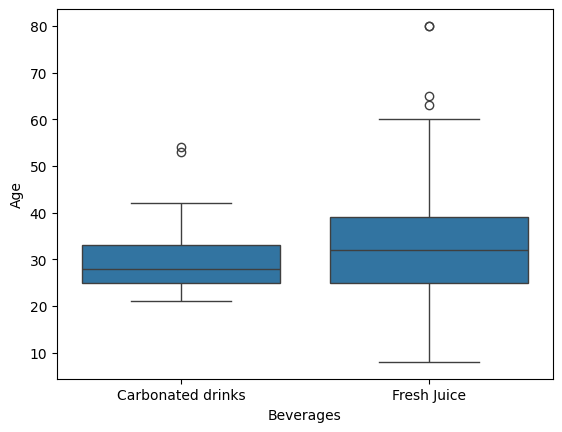

In [ ]:
#boxplot
sns.boxplot(x='Beverages', y='Age', data=df_fem)

In [ ]:
#Analysis by female nationality
analyze_beverages_nationality_fem = df_fem.groupby('Beverages')['Nationality'].value_counts()
display(analyze_beverages_nationality_fem)

Beverages          Nationality
Carbonated drinks  Indian          12
                   Maldivian        1
Fresh Juice        Indian         137
                   Malaysian        5
                   Indonesian       2
                   Algerian         1
                   China            1
                   Indonesian       1
                   Japan            1
                   Maldivian        1
                   Mauritian        1
                   Nigerian         1
                   Pakistani        1
Name: count, dtype: int64

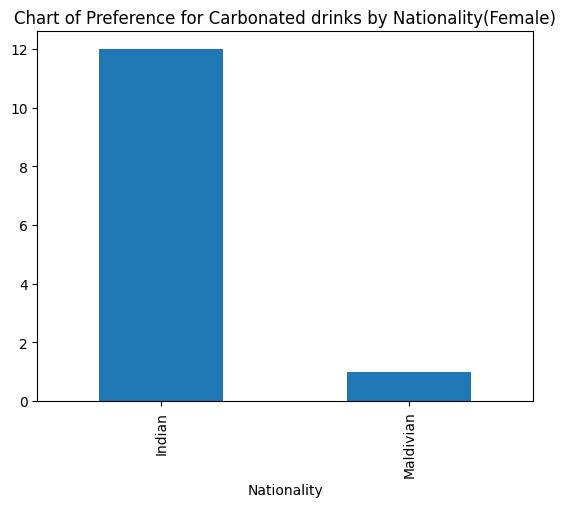

In [ ]:
analyze_beverages_nationality_fem['Carbonated drinks'].plot.bar()
plt.title('Chart of Preference for Carbonated drinks by Nationality(Female)')
plt.show()

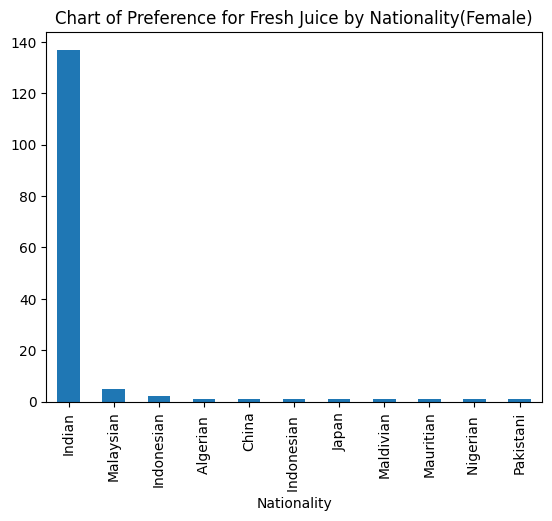

In [ ]:
analyze_beverages_nationality_fem['Fresh Juice'].plot.bar()
plt.title('Chart of Preference for Fresh Juice by Nationality(Female)')
plt.show()

### Male audience preference


In [ ]:
#Filtering data for the male audience
df_male = df[df['Gender'] == 'Male']

In [ ]:
display(df_male[['Gender','Age','Nationality','Beverages']])

,Gender,Age,Nationality,Beverages
0,Male,24,Indian,Fresh Juice
2,Male,31,Indian,Fresh Juice
4,Male,27,Indian,Fresh Juice
5,Male,24,Indian,Fresh Juice
7,Male,24,Pakistani,Carbonated drinks
...,...,...,...,...
283,Male,27,Indian,Fresh Juice
284,Male,24,Indian,Fresh Juice
285,Male,25,Indian,Fresh Juice
286,Male,27,Indian,Fresh Juice


In [ ]:
#Analysis of beverages preference by the male audience;
analyze_beverages_male = df.loc[df['Gender'] == 'Male',['Beverages']].value_counts()
display(analyze_beverages_male)

Beverages        
Fresh Juice          100
Carbonated drinks     19
Name: count, dtype: int64

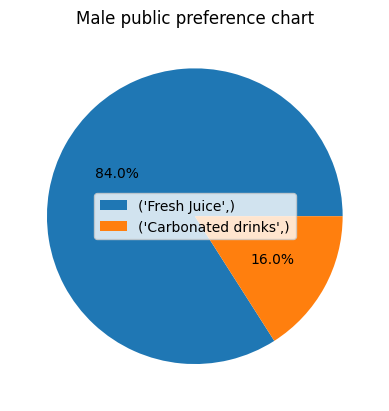

In [ ]:
#Graphic
plt.pie(analyze_beverages_male, autopct='%1.1f%%')
plt.title('Male public preference chart')
plt.legend(analyze_beverages_male.index, loc='best')
plt.show()

In [ ]:
#Analysing by age;
analyze_beverages_age_male = df_male.groupby('Beverages')['Age'].value_counts()
display(analyze_beverages_age_male)

Beverages          Age
Carbonated drinks  23      4
                   21      4
                   15      1
                   18      1
                   60      1
                   56      1
                   30      1
                   28      1
                   27      1
                   25      1
                   24      1
                   22      1
                   19      1
Fresh Juice        27     11
                   24     10
                   26      8
                   25      8
                   23      6
                   38      5
                   28      5
                   19      5
                   20      4
                   13      4
                   30      4
                   22      3
                   9       3
                   34      3
                   21      3
                   31      2
                   29      2
                   33      2
                   67      1
                   59      1
                   3

<Axes: xlabel='Beverages', ylabel='Age'>

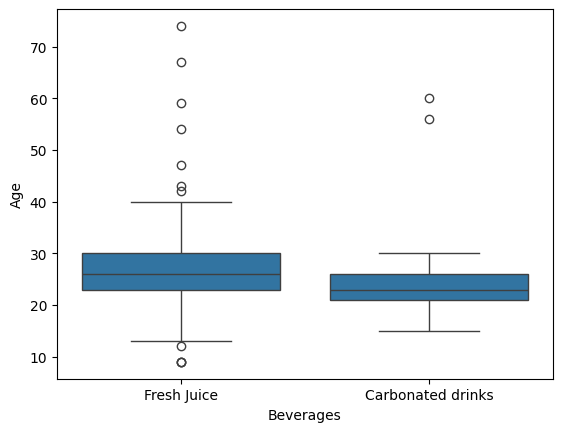

In [ ]:
#boxplot
sns.boxplot(x='Beverages', y='Age', data=df_male)

In [ ]:
#Analysis by female nationality
analyze_beverages_nationality_male = df_male.groupby('Beverages')['Nationality'].value_counts()
display(analyze_beverages_nationality_male)

Beverages          Nationality
Carbonated drinks  Indian         12
                   Malaysian       3
                   Pakistani       2
                   Indonesian      1
                   Seychellois     1
Fresh Juice        Indian         77
                   Malaysian       7
                   Indonesian      6
                   Pakistani       3
                   Canadian        1
                   Japan           1
                   Korean          1
                   Malaysia        1
                   Maldivian       1
                   Tanzanian       1
                   Yemen           1
Name: count, dtype: int64

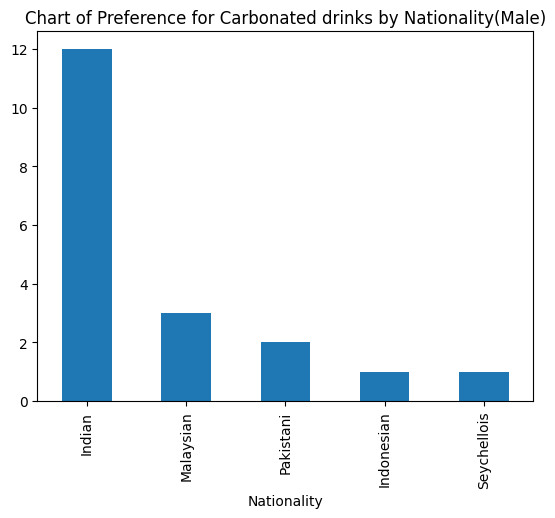

In [ ]:
analyze_beverages_nationality_male['Carbonated drinks'].plot.bar()
plt.title('Chart of Preference for Carbonated drinks by Nationality(Male)')
plt.show()

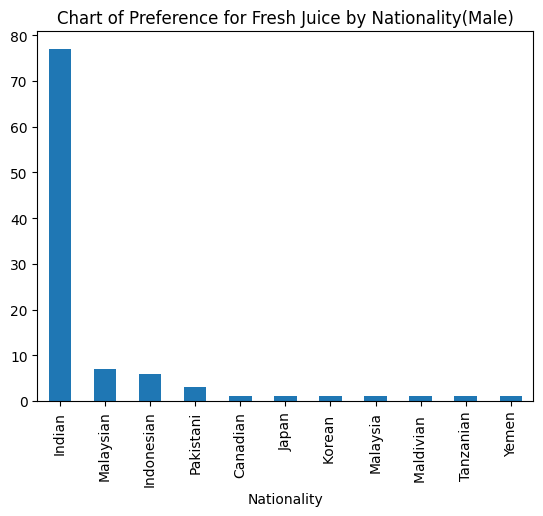

In [ ]:
analyze_beverages_nationality_male['Fresh Juice'].plot.bar()
plt.title('Chart of Preference for Fresh Juice by Nationality(Male)')
plt.show()

## Analysis of Dessert preferences

### preference of the general public


In [ ]:
display(df[['Gender','Age','Nationality','Dessert']])

,Gender,Age,Nationality,Dessert
0,Male,24,Indian,Maybe
1,Female,22,Indian,Yes
2,Male,31,Indian,Maybe
3,Female,25,Indian,Maybe
4,Male,27,Indian,Maybe
...,...,...,...,...
283,Male,27,Indian,Yes
284,Male,24,Indian,Yes
285,Male,25,Indian,Yes
286,Male,27,Indian,Yes


In [ ]:
#Dessert preference analysis for the general public;
analyze_dessert = df['Dessert'].value_counts()
display(analyze_dessert)

Dessert
Maybe    122
Yes      110
No        52
Name: count, dtype: int64

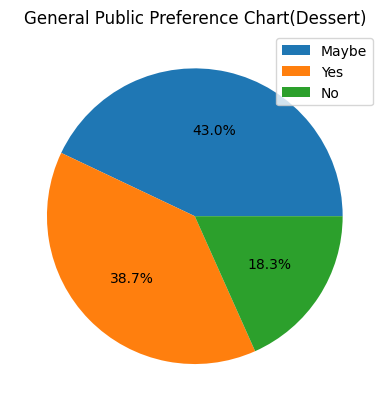

In [ ]:
#Creating Chart for a Clearer Sense;
plt.pie(analyze_dessert, autopct='%1.1f%%')
plt.title('General Public Preference Chart(Dessert)')
plt.legend(analyze_dessert.index, loc='best')
plt.show()

In [ ]:
#Analysing by age;
analyze_dessert_age = df.groupby('Dessert')['Age'].value_counts()
collumn_dessert_age = pd.concat([analyze_dessert_age['Yes'],
                                 analyze_dessert_age['Maybe'],
                                 analyze_dessert_age['No']],
                                 axis=1)
collumn_dessert_age.columns = ['Yes', 'Maybe', 'No']
display(collumn_dessert_age)

,Yes,Maybe,No
Age,,,
24,13,7,NaN
25,10,12,1
27,8,5,4
23,6,5,2
30,5,8,1
21,5,6,NaN
19,5,5,NaN
26,4,3,4
22,4,5,1


<Axes: xlabel='Dessert', ylabel='Age'>

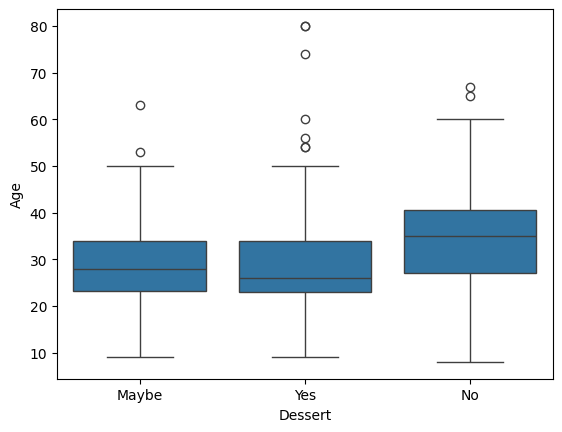

In [ ]:
#boxplot
sns.boxplot(x='Dessert', y='Age', data=df)

In [ ]:
#Analysis by nationality
analyze_dessert_nationality = df.groupby('Dessert')['Nationality'].value_counts()
collumn_dessert_nationality = pd.concat([analyze_dessert_nationality['Yes'],
                             analyze_dessert_nationality['Maybe'],
                             analyze_dessert_nationality['No']],
                              axis=1)
collumn_dessert_nationality.columns = ['Yes', 'Maybe', 'No']
display(collumn_dessert_nationality)


,Yes,Maybe,No
Nationality,,,
Indian,88,103,47
Malaysian,9,5,1
Pakistani,4,2,NaN
Indonesian,2,7,NaN
Canadian,1,NaN,NaN
Nigerian,1,NaN,NaN
Maldivian,1,1,NaN
Malaysia,1,NaN,NaN
Indonesian,1,NaN,NaN


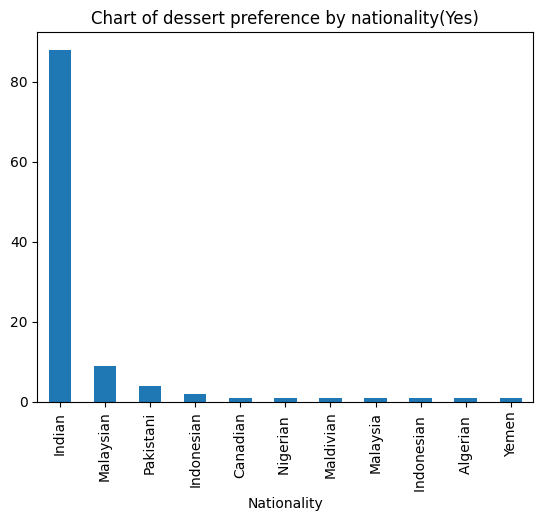

In [ ]:
analyze_dessert_nationality['Yes'].plot.bar()
plt.title('Chart of dessert preference by nationality(Yes)')
plt.show()

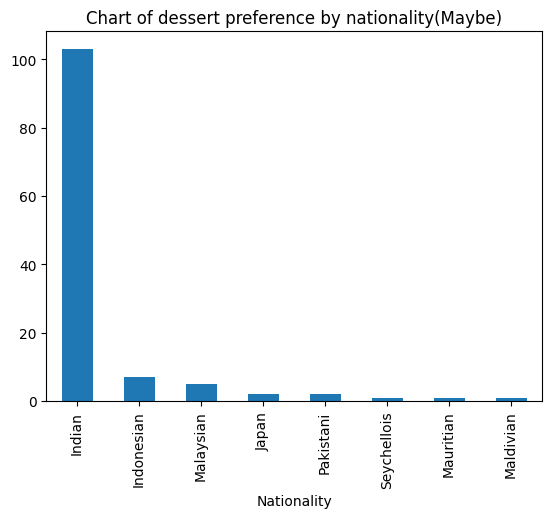

In [ ]:
analyze_dessert_nationality['Maybe'].plot.bar()
plt.title('Chart of dessert preference by nationality(Maybe)')
plt.show()

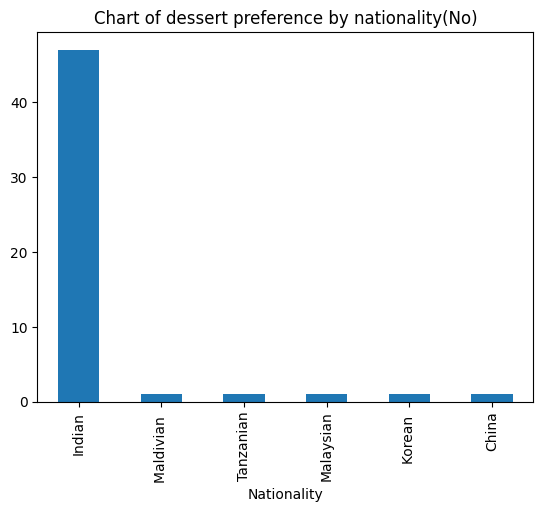

In [ ]:
analyze_dessert_nationality['No'].plot.bar()
plt.title('Chart of dessert preference by nationality(No)')
plt.show()

### Female audience preference

In [ ]:
display(df_fem[['Gender','Age','Nationality','Dessert']])

,Gender,Age,Nationality,Dessert
1,Female,22,Indian,Yes
3,Female,25,Indian,Maybe
6,Female,34,Indian,Yes
8,Female,19,Indian,Yes
9,Female,16,Indian,Yes
...,...,...,...,...
258,Female,42,Indian,No
259,Female,37,Indian,Yes
260,Female,46,Indian,No
261,Female,36,Indian,Maybe


In [ ]:
#Analysis of dessert preference by the female audience;
analyze_dessert_fem = df.loc[df['Gender'] == 'Female',['Dessert']].value_counts()
display(analyze_dessert_fem)

Dessert
Maybe      72
Yes        58
No         35
Name: count, dtype: int64

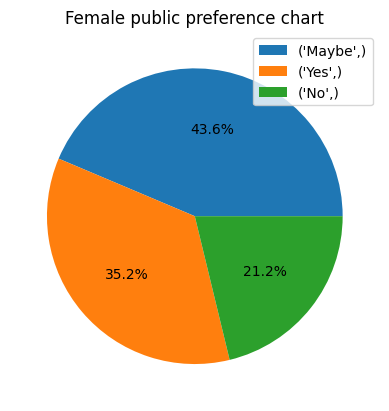

In [ ]:
#Graphic
plt.pie(analyze_dessert_fem, autopct='%1.1f%%')
plt.title('Female public preference chart')
plt.legend(analyze_dessert_fem.index, loc='best')
plt.show()

In [ ]:
#Analysing by age;
analyze_dessert_age_fem = df_fem.groupby('Dessert')['Age'].value_counts()
collumn_dessert_age_fem = pd.concat([analyze_dessert_age_fem['Yes'],
                                 analyze_dessert_age_fem['Maybe'],
                                 analyze_dessert_age_fem['No']],
                                 axis=1)
collumn_dessert_age_fem.columns = ['Yes', 'Maybe', 'No']
display(collumn_dessert_age_fem)

,Yes,Maybe,No
Age,,,
24,5,4,NaN
25,5,8,1
37,4,2,2
29,3,NaN,1
19,3,1,NaN
20,3,NaN,NaN
21,3,1,NaN
27,3,2,NaN
30,3,5,1


<Axes: xlabel='Dessert', ylabel='Age'>

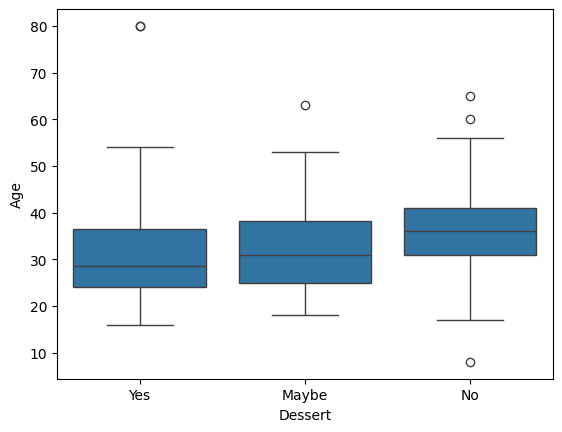

In [ ]:
#boxplot
sns.boxplot(x='Dessert', y='Age', data=df_fem)

In [ ]:
#Analysis by nationality
analyze_dessert_nationality_fem = df.groupby('Dessert')['Nationality'].value_counts()
collumn_dessert_nationality_fem = pd.concat([analyze_dessert_nationality_fem ['Yes'],
                                 analyze_dessert_nationality_fem ['Maybe'],
                                 analyze_dessert_nationality_fem ['No']],
                                 axis=1)
collumn_dessert_nationality_fem.columns = ['Yes', 'Maybe', 'No']
display(collumn_dessert_nationality_fem)

,Yes,Maybe,No
Nationality,,,
Indian,88,103,47
Malaysian,9,5,1
Pakistani,4,2,NaN
Indonesian,2,7,NaN
Canadian,1,NaN,NaN
Nigerian,1,NaN,NaN
Maldivian,1,1,NaN
Malaysia,1,NaN,NaN
Indonesian,1,NaN,NaN


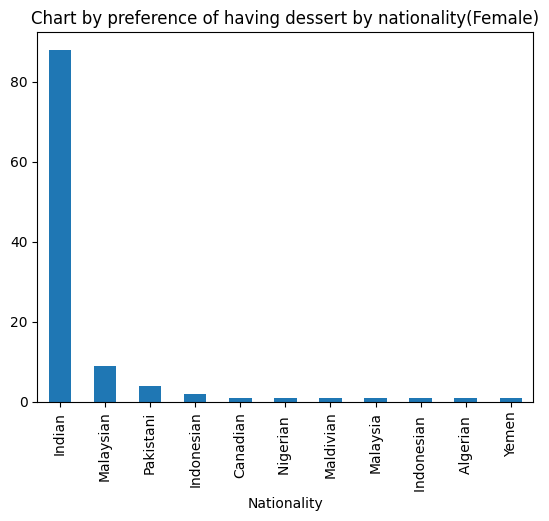

In [ ]:
analyze_dessert_nationality_fem['Yes'].plot.bar()
plt.title('Chart by preference of having dessert by nationality(Female)')
plt.show()

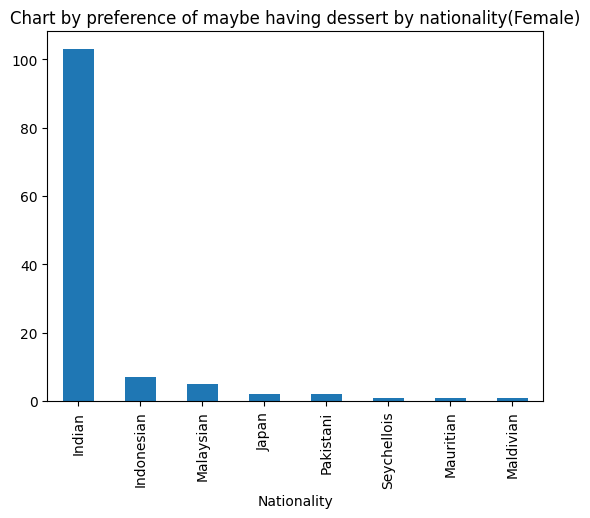

In [ ]:
analyze_dessert_nationality_fem['Maybe'].plot.bar()
plt.title('Chart by preference of maybe having dessert by nationality(Female)')
plt.show()

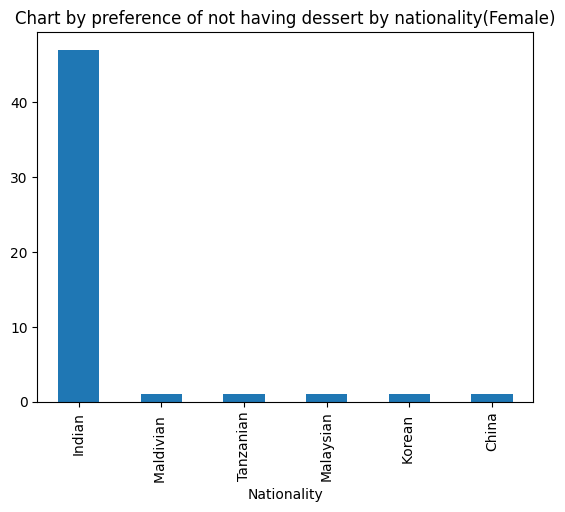

In [ ]:
analyze_dessert_nationality_fem['No'].plot.bar()
plt.title('Chart by preference of not having dessert by nationality(Female)')
plt.show()

### Male audience preference

In [ ]:
display(df_male[['Gender','Age','Nationality','Dessert']])

,Gender,Age,Nationality,Dessert
0,Male,24,Indian,Maybe
2,Male,31,Indian,Maybe
4,Male,27,Indian,Maybe
5,Male,24,Indian,Yes
7,Male,24,Pakistani,Yes
...,...,...,...,...
283,Male,27,Indian,Yes
284,Male,24,Indian,Yes
285,Male,25,Indian,Yes
286,Male,27,Indian,Yes


In [ ]:
#Analysis of dessert preference by the male audience;
analyze_dessert_male = df.loc[df['Gender'] == 'Male',['Dessert']].value_counts()
display(analyze_dessert_male)

Dessert
Yes        52
Maybe      50
No         17
Name: count, dtype: int64

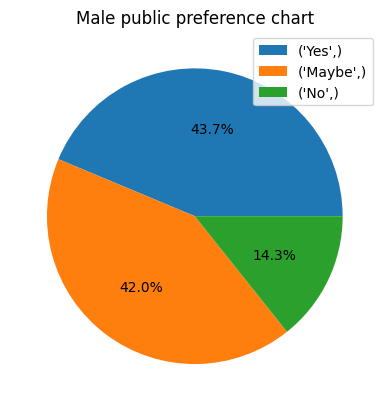

In [ ]:
#Graphic
plt.pie(analyze_dessert_male, autopct='%1.1f%%')
plt.title('Male public preference chart')
plt.legend(analyze_dessert_male.index, loc='best')
plt.show()

In [ ]:
#Analysing by age;
analyze_dessert_age_male = df_male.groupby('Dessert')['Age'].value_counts()
collumn_dessert_age_male = pd.concat([analyze_dessert_age_male['Yes'],
                                 analyze_dessert_age_male['Maybe'],
                                 analyze_dessert_age_male['No']],
                                 axis=1)
collumn_dessert_age_male.columns = ['Yes', 'Maybe', 'No']
display(collumn_dessert_age_male)

,Yes,Maybe,No
Age,,,
24,8,3,NaN
23,6,3,1
27,5,3,4
25,5,4,NaN
38,3,1,1
26,3,2,3
30,2,3,NaN
28,2,4,NaN
9,2,1,NaN


<Axes: xlabel='Dessert', ylabel='Age'>

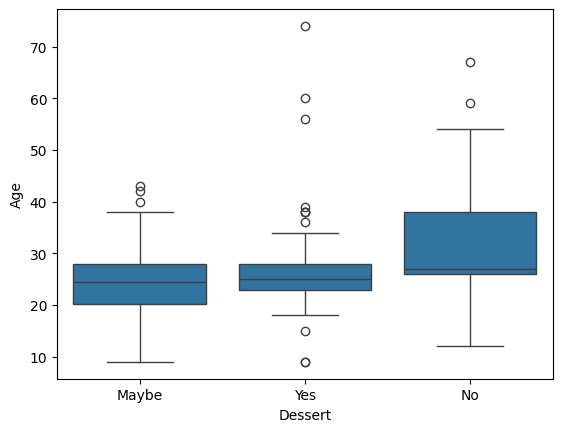

In [ ]:
#boxplot
sns.boxplot(x='Dessert', y='Age', data=df_male)

In [ ]:
#Analysis by nationality
analyze_dessert_nationality_male = df.groupby('Dessert')['Nationality'].value_counts()
collumn_dessert_nationality_male = pd.concat([analyze_dessert_nationality_male ['Yes'],
                                 analyze_dessert_nationality_male ['Maybe'],
                                 analyze_dessert_nationality_male ['No']],
                                 axis=1)
collumn_dessert_nationality_male.columns = ['Yes', 'Maybe', 'No']
display(collumn_dessert_nationality_male)

,Yes,Maybe,No
Nationality,,,
Indian,88,103,47
Malaysian,9,5,1
Pakistani,4,2,NaN
Indonesian,2,7,NaN
Canadian,1,NaN,NaN
Nigerian,1,NaN,NaN
Maldivian,1,1,NaN
Malaysia,1,NaN,NaN
Indonesian,1,NaN,NaN


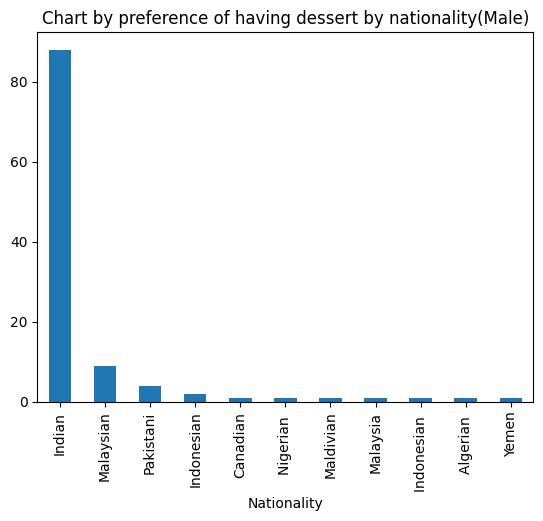

In [ ]:
analyze_dessert_nationality_male['Yes'].plot.bar()
plt.title('Chart by preference of having dessert by nationality(Male)')
plt.show()

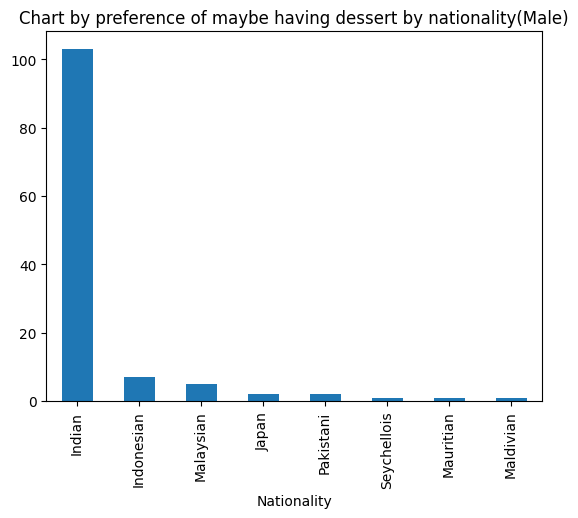

In [ ]:
analyze_dessert_nationality_male['Maybe'].plot.bar()
plt.title('Chart by preference of maybe having dessert by nationality(Male)')
plt.show()

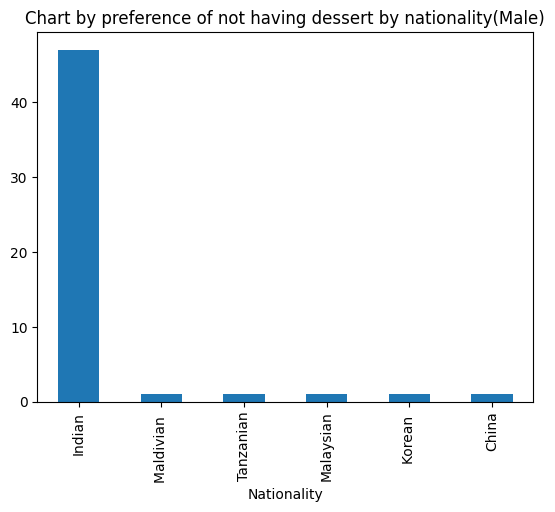

In [ ]:
analyze_dessert_nationality_male['No'].plot.bar()
plt.title('Chart by preference of not having dessert by nationality(Male)')
plt.show()